In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

In [2]:
from torchvision import datasets

# torchvision = 0.7の場合
# datasets.MNIST.resources = [
#     ("https://azureopendatastorage.azurefd.net/mnist/train-images-idx3-ubyte.gz",
#         "f68b3c2dcbeaaa9fbdd348bbdeb94873"),
#     ("https://azureopendatastorage.azurefd.net/mnist/train-labels-idx1-ubyte.gz",
#         "d53e105ee54ea40749a09fcbcd1e9432"),
#     ("https://azureopendatastorage.azurefd.net/mnist/t10k-images-idx3-ubyte.gz",
#         "9fb629c4189551a2d022fa330f9573f3"),
#     ("https://azureopendatastorage.azurefd.net/mnist/t10k-labels-idx1-ubyte.gz",
#         "ec29112dd5afa0611ce80d1b7f02629c")
# ]

# torchvision 0.8?以降
datasets.MNIST.mirrors = [
    "https://azureopendatastorage.azurefd.net/mnist/"
]

# 誤ってv0.8以降でresourcesを書き換えてしまった場合の復元用
# datasets.MNIST.resources = [
#     ("train-images-idx3-ubyte.gz", "f68b3c2dcbeaaa9fbdd348bbdeb94873"),
#     ("train-labels-idx1-ubyte.gz", "d53e105ee54ea40749a09fcbcd1e9432"),
#     ("t10k-images-idx3-ubyte.gz", "9fb629c4189551a2d022fa330f9573f3"),
#     ("t10k-labels-idx1-ubyte.gz", "ec29112dd5afa0611ce80d1b7f02629c")
# ]

mnist = datasets.MNIST('../data',
                            train=True,
                            download=True)
mnist_val = datasets.MNIST('../data', train=False, download=True)

In [10]:
len(dataset1)

60000

In [13]:
img, label = mnist[0]

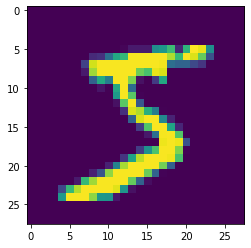

In [16]:
plt.imshow(img)
plt.show()

In [15]:
label

5

In [17]:
from torchvision import transforms
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

ToTensor()によってNumpy配列をPIL画像のテンソルに変換します。  
出力テンソルの順番は C x H x W (チャネルx高さx幅)となります。

In [18]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([1, 28, 28])